# Interpolacaión y ajuste de curvas

Frecuentemente nos enfrentamos a este problema

* dados $n+1$ datos $(x_i,y_i)$ con $i=0,1,\ldots ,n$, estima $y(x)$,
cuando tenemos que analizar datos de observaciones experimentales o de cálculos numéricos.

<div> <img src="../fig/interVSfit.jpg" alt="Drawing" style="width: 300px;"/></div>


* Interpolación: construir una curva que **pase por los datos**. Entonces estamos asumiendo que los datos son precisos.
* Ajuste a una curva: construir una curva que **aproxime los datos**. Entonces estamos asumiendo que los datos tienen **ruido** (por ejemplo el debido a los errores en la medición). La curva no necesariamente pasa por los datos.


# Métdodo de Lagrange

Se busca un polinomio que pase por cada uno de los puntos de la función, a partir de las diferencias divididas:

\begin{equation*}
f(x_i - x_{i-1}) = \frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}}
\end{equation*}

Se propone un polinomio de la forma:

\begin{equation*}
P_n(x)= \sum_{i=0}^{n}  A_i(x-x_1)(x-x_2)\cdots(x-x_{n-1}) 
\end{equation*}

que es un polinomio de grado n−1 ylos coeficientes $A_i$ deben determinarse de tal manera
que el polinomio pase por todos y cada uno de los puntos de la función tabular.

Evaluando en x = $x_0$ y despejando $A_0$

\begin{equation*}
A_0=\frac{P_0}{(x_0-x_1)(x_0-x_2)\cdots(x_0-x_{n-1})} 
\end{equation*}

asi hasta el punto x = $x_n$


\begin{equation*}
A_n=\frac{P_n}{(x_n-x_1)(x_n-x_2)\cdots(x_n-x_{n-1})} 
\end{equation*}

y entonces el polinomio $P_n(x)$ es:

\begin{equation*}
P_n(x)=\frac{P_0(x-x_2)\cdots(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)\cdots(x_0-x_{n-1})}+\cdots+\frac{P_n(x-x_2)\cdots(x-x_{n-1})}{(x_n-x_1)(x_n-x_2)\cdots(x_n-x_{n-1})} 
\end{equation*}

que es la expresión de Lagrange:

\begin{equation*}
P_n(x) = \sum_{i=0}^{n} y_i \ell_i(x) = \sum_{i=0}^{n} y_i \prod_{j(\neq i) = 0}^n \frac{x-x_j}{x_i-x_j},~~~~~i=0,1,\ldots ,n.
\end{equation*}

donde $\ell_i(x)$ son **funciones cardinales** 

Si $n=1$, $P_1(x) = y_0 \ell_0(x)+y_1 \ell_1(x)$ es una recta, donde

\begin{align*}
\ell_0(x) = \frac{x-x_1}{x_0-x_1} && \ell_1(x) = \frac{x-x_0}{x_1-x_0}.
\end{align*}

Si $n=2$, $P_2(x) = y_0 \ell_0(x)+y_1 \ell_1(x)+y_2 \ell_2(x)$ es una parábola, donde

\begin{align*}
\ell_0(x) &= \frac{x-x_1}{x_0-x_1}\frac{x-x_2}{x_0-x_2}, \\ 
\ell_1(x) &= \frac{x-x_0}{x_1-x_0}\frac{x-x_2}{x_1-x_2}, \\
\ell_2(x) &= \frac{x-x_0}{x_2-x_0}\frac{x-x_1}{x_2-x_1}. 
\end{align*}


<div> <img src="../fig/interVSfit-1.jpg" alt="Drawing" style="width: 300px;"/></div>

Las funciones cardinales tienen la propiedad de

\begin{align*}
\ell_i(x_j) = \Biggl\{\begin{array}{cc}
0 & si ~i\neq j \\
1 & si ~i = j 
\end{array} \Biggr\} = \delta_{ij}
\end{align*}

Para mostrar que los polinomios pasan por los datos, podemos sustituir $x=x_j$ en $P_n$ y luego usar sus propiedades, para tener

\begin{equation*}
P_n(x_j) = \sum_{i=0}^{n} y_i \ell_i(x_j) = \sum_{i=0}^{n} y_i \delta_{ij} = y_j.
\end{equation*}

Tambien se puede mostrar que el error en la interpolación con polinomios es

\begin{equation*}
f(x) - P_n(x) = \frac{(x-x_0)(x-x_1)\cdots(x-x_n)}{(n+1)!}f^{(n+1)}(\xi),
\end{equation*}

donde $\xi \in (x_0,x_n)$, asi que cuanto más lejos este un dato de $x$, más contribuye al error en $x$.


# Ejemplo 1: Método de Lagrange

In [8]:
try:
  x = [0, 20, 40, 60]
  y = [26.0, 48.6, 61.6, 71.2]
  m = len(x)
  n = m-1
  xp = float(input('Enter x : '))
  yp = 0
  for i in range(n+1):
    L = 1
    for j in range(n+1):
        if j != i:
            L *= (xp - x[j])/(x[i] - x[j])
    yp += y[i]*L
    print('For x = %.1f, y = %.1f' % (xp,yp))
except:
  print('Please insert a valid number')

For x = 50.0, y = 1.6
For x = 50.0, y = -13.6
For x = 50.0, y = 44.2
For x = 50.0, y = 66.4


           5             4             3           2
3.698e-08 x - 9.688e-06 x + 0.0009219 x - 0.04463 x + 1.725 x + 26
Para x=50, y= 66.94765624999957


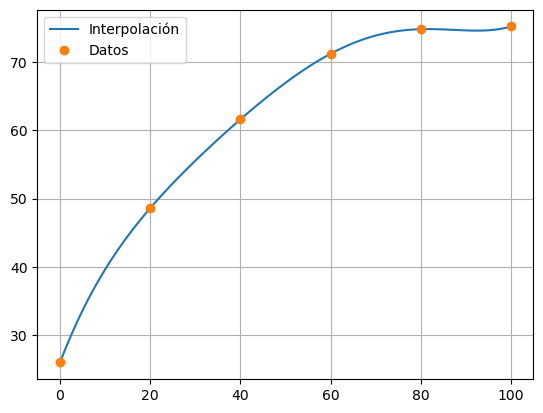

In [9]:
#Método de Lagrange con scipy
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

x=[0,20,40,60,80,100]
y=[26.0,48.6,61.6,71.2,74.8,75.2]
L=lagrange(x,y)
x1=np.arange(0,100,1)
print(L)
print("Para x=50, y=",L(50))
plt.plot(x1,L(x1),label="Interpolación")
plt.plot(x,y,"o",label="Datos")
plt.legend()
plt.grid()
plt.show()

El método de Lagrange también puede ser utilizada para datos que no están igualmente espaciados

# Ejemplo 2: 

Usando el método de interpolación de Lagrange,

1. Código visto en clase
2. Función de scipy

encuentre el valor de relación de expansión correspondiente a un peso de $5.5$ libras dentro de una lista de valores de tensiones de prueba: 

| Peso (lb) | Expansión |
| --- | --- |
| 2.4 | 0.101 |  
| 5.1 | 0.128 |  
| 7.0 | 0.241 |  
| 8.5 | 0.403 |
| 9.7 | 0.677 |